In [1]:
%config InlineBackend.figure_format = 'retina'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Set up directories

In [3]:
from pathlib import Path
data_root = Path.home() / "data" / "tmp"
sample_dir = data_root / "cats_vs_dogs_sample"

# Train model from scratch

## Create model

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [6]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Create training data generator

In [7]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        str(sample_dir / "train"),
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        str(sample_dir / "validation"),
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fit model

In [8]:
%%time
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 15s 147ms/step - loss: 0.6930 - acc: 0.5115 - val_loss: 0.6763 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 7s 71ms/step - loss: 0.6618 - acc: 0.6015 - val_loss: 0.6364 - val_acc: 0.6560
Epoch 3/30
100/100 [==============================] - 7s 72ms/step - loss: 0.6116 - acc: 0.6670 - val_loss: 0.6438 - val_acc: 0.6440
Epoch 4/30
100/100 [==============================] - 7s 71ms/step - loss: 0.5704 - acc: 0.7030 - val_loss: 0.6266 - val_acc: 0.6560
Epoch 5/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5396 - acc: 0.7240 - val_loss: 0.5897 - val_acc: 0.6690
Epoch 6/30
100/100 [==============================] - 7s 71ms/step - loss: 0.5160 - acc: 0.7440 - val_loss: 0.5660 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 7s 72ms/step - loss: 0.4810 - acc: 0.7600 - val_loss: 0.5522 - val_acc: 0.7010
Epoch 8/30
100/100 [==============================] - 7s 71ms/step 

In [47]:
import json

models_dir = data_root / "models" 
models_dir.mkdir(exist_ok=True)
model.save(models_dir / "cats_and_dogs_small_from_scratch.h5")

history_path = models_dir / "cats_and_dogs_small_from_scratch_history.json"
with open(history_path, "w") as f:
    json.dump(history.history, f)

In [48]:
history = json.load(open(history_path))

## Plot training vs test accuracy

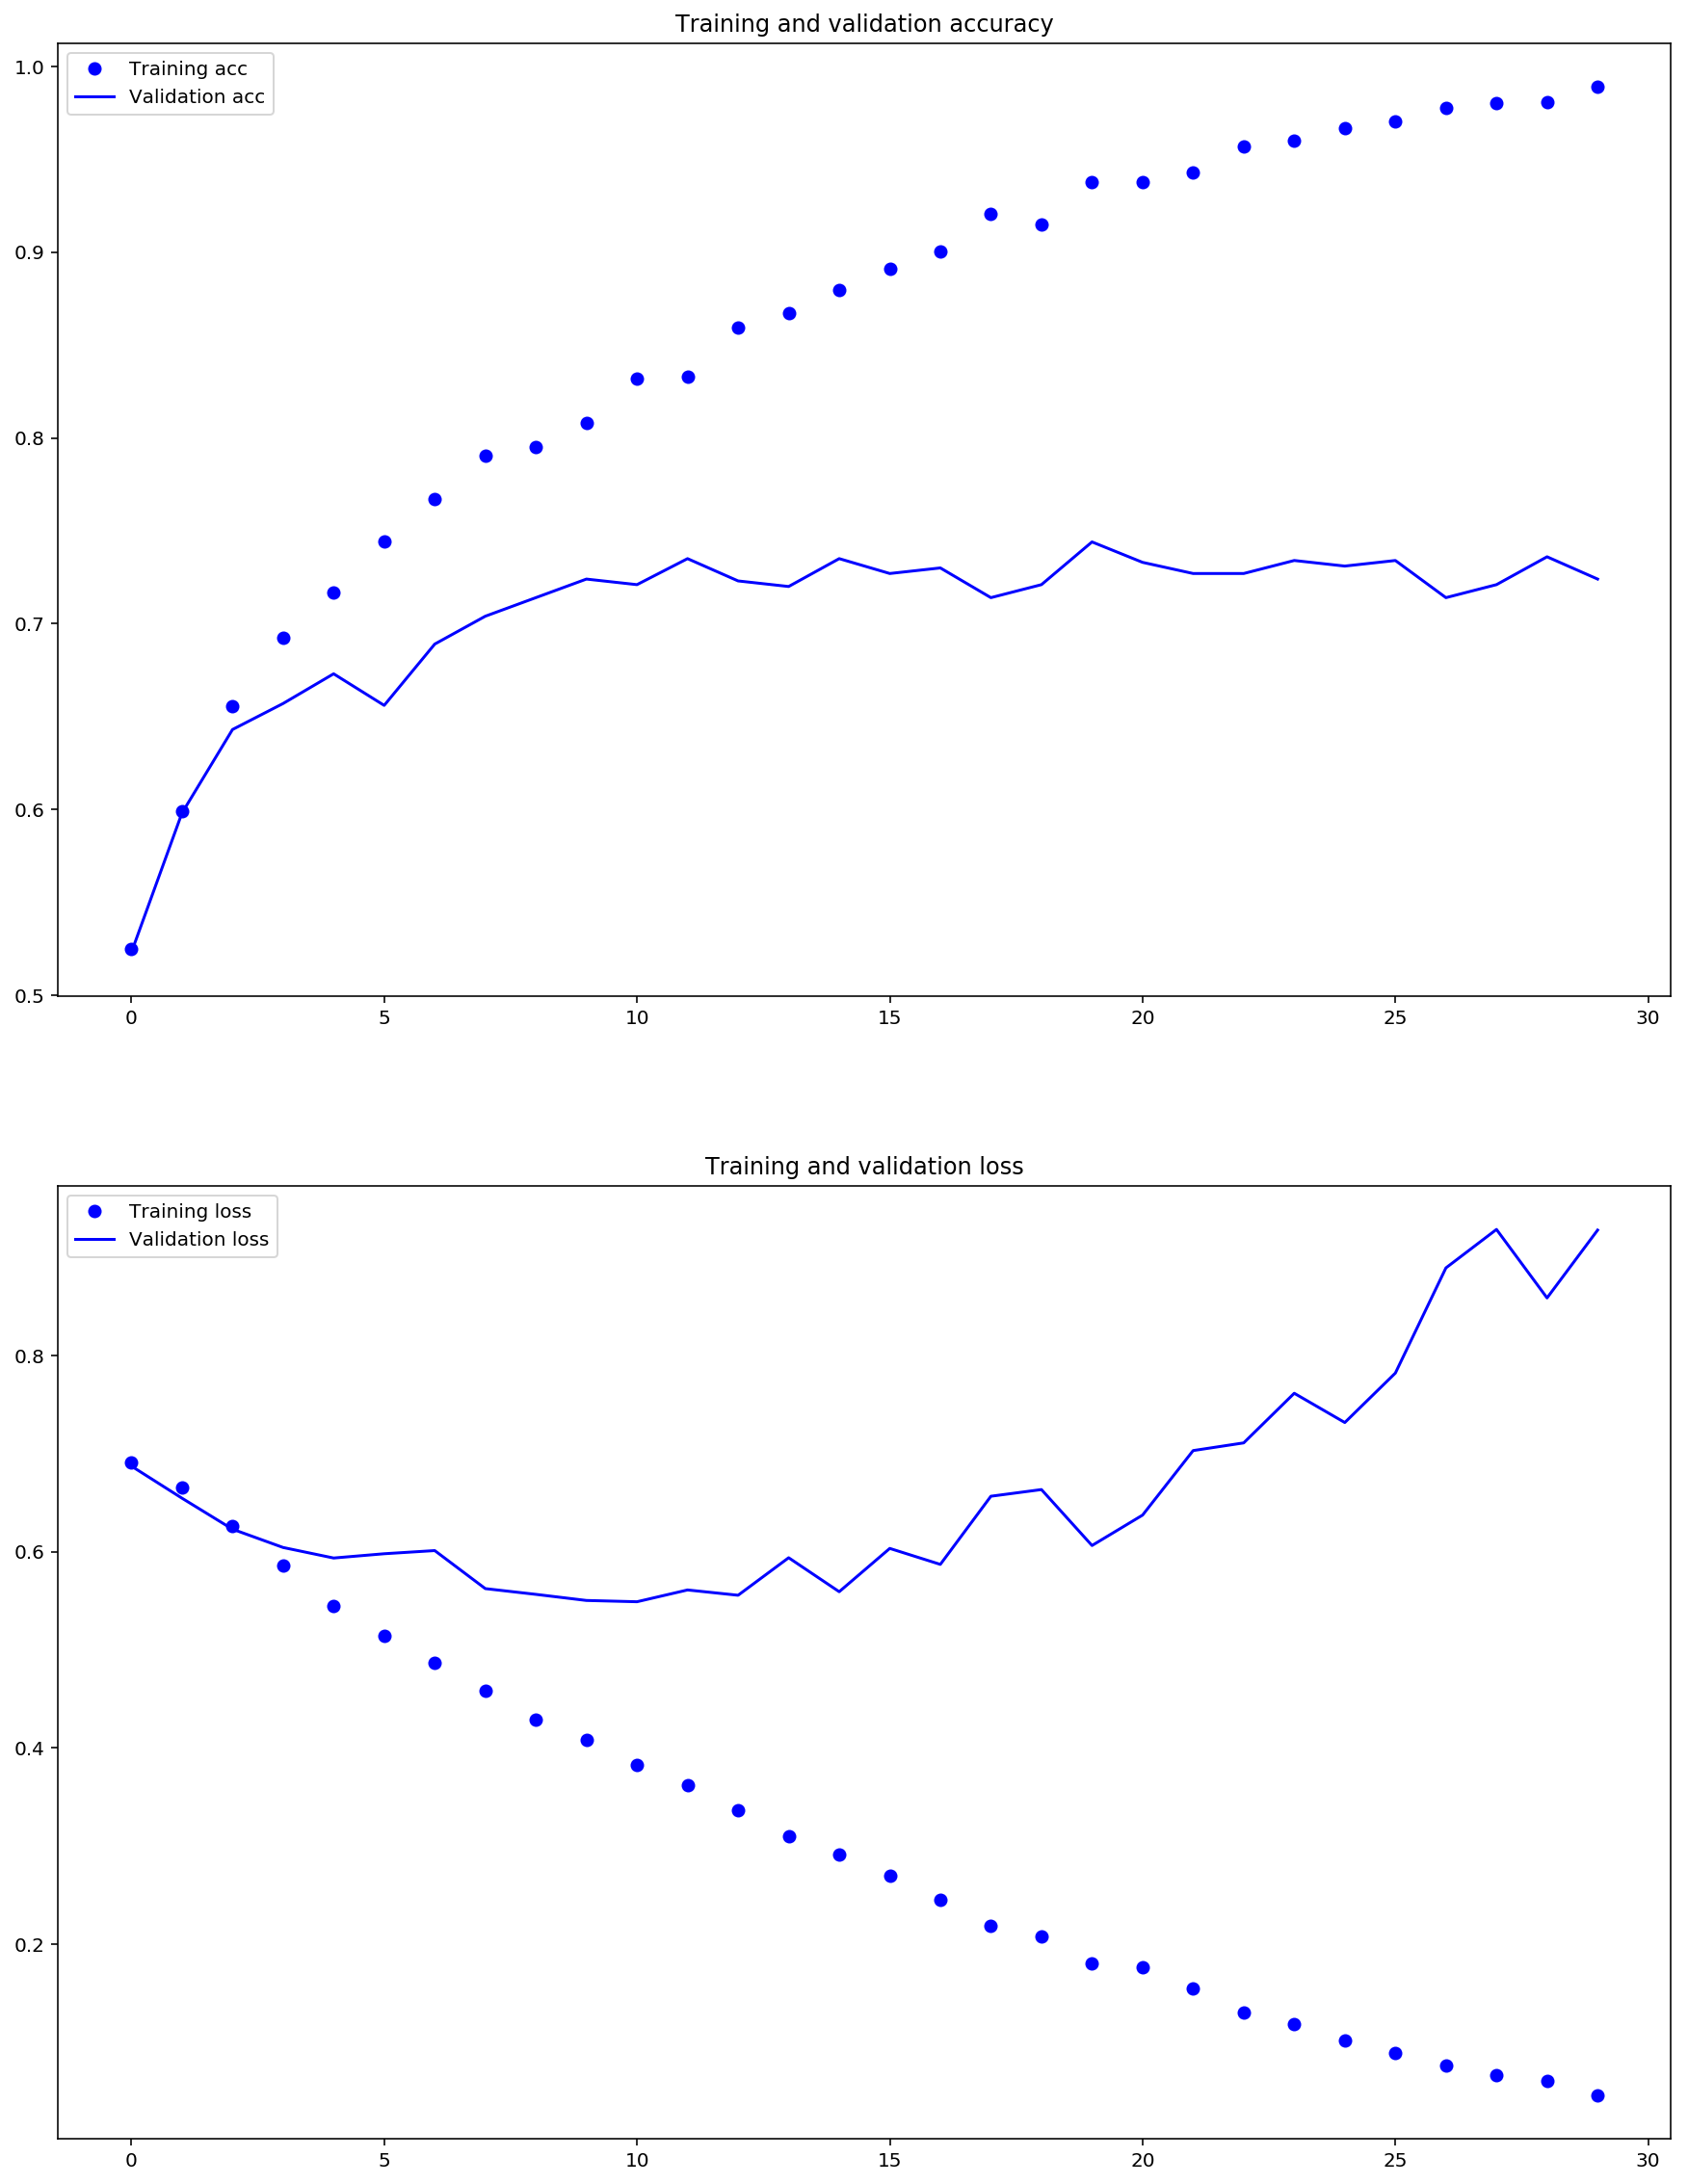

In [51]:
import matplotlib.pyplot as plt

acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15, 20))

plt.subplot(211)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(212)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()